<a href="https://colab.research.google.com/github/antonsysoev/appl_stat/blob/gh-pages/Practise_random_numbers_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Давайте воспользуемся генератором случайных чисел R для нормального распределения/ Cписки значений, генерируемые функцией rnorm(), берутся из популяции, которая действительно имеет нормальное распределение.

* Сгенерируйте список из 10 случайных нормально распределенных чисел со средним значением 15 и стандартным отклонением 3.
* С помощью функции hist() постройте гистограмму распределения этих чисел.
* Постройте график QQ-plot из сгенерированных чисел.
* Повторите действия несколько раз (не менее десятка раз). Для каждого из них посмотрите на гистограммы и графики QQ. Подумайте, чем они отличаются от  нормального распределения (но помните, что каждая из этих выборок взята из действительно нормальной популяции).

2. Файл "mammals.csv" содержит информацию о массе тела различных видов млекопитающих.

* Изобразите распределение массы тела и опишите его форму. Похоже ли это на нормальное распределение?
* Преобразуйте данные о массе тела с помощью логарифмического преобразования. Постройте график распределения логарифмической массы тела. Опишите новое распределение и проверьте его на нормальность. (Попробуйте 2-3 распределения и выберите лучшее).

In [75]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [90]:
%%R

library(data.table)
data <-fread("/content/mammals.csv")

In [91]:
%%R

data

                         name body_mass_kg brain_mass_g
 1:                Arctic fox         3.38        44.50
 2:                Owl monkey         0.48        15.50
 3:           Mountain beaver         1.35         8.10
 4:                       Cow       465.00       423.00
 5:                 Grey wolf        36.33       119.50
 6:                      Goat        27.66       115.00
 7:                  Roe deer        14.83        98.20
 8:                Guinea pig         1.04         5.50
 9:                    Verbet         4.19        58.00
10:                Chinchilla         0.42         6.40
11:           Ground squirrel         0.10         4.00
12:    Arctic ground squirrel         0.92         5.70
13: African giant pouched rat         1.00         6.60
14: Lesser short-tailed shrew         0.01         0.14
15:           Star-nosed mole         0.06         1.00
16:     Nine-banded armadillo         3.50        10.80
17:                Tree hyrax         2.00      

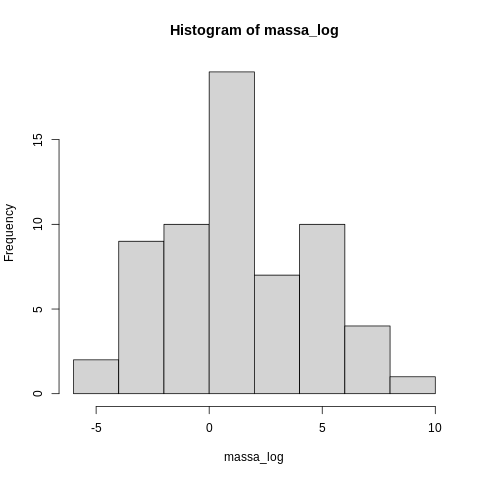

In [97]:
%%R
#hist(data$body_mass_kg)
massa_log <- log(data$body_mass_kg)
massa_log
hist(massa_log)

In [80]:
%%R

library(MASS)

paramentry <- fitdistr(data$X1, "normal")
paramentry

     mean         sd    
  7.0409091   3.5140832 
 (0.5297680) (0.3746025)


In [85]:
%%R

new_data <- rnorm(100, as.numeric(paramentry$estimate[1]), as.numeric(paramentry$estimate[2]))

In [82]:
%%R

new_data

 [1]  1.458183 10.623306 12.448411 14.114117 11.806504 10.697077 10.670045
 [8]  4.885196  1.964831  6.319280


In [87]:
%%R

ks.test(data$X1, as.numeric(paramentry$estimate[1]), as.numeric(paramentry$estimate[2]))


	Exact two-sample Kolmogorov-Smirnov test

data:  data$X1 and as.numeric(paramentry$estimate[1])
D = 0.52273, p-value = 0.9778
alternative hypothesis: two-sided

